<a href="https://colab.research.google.com/github/lucreziacerto/EL_project/blob/main/Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt  # useful for data vizualisation
import seaborn as sns

import datetime

In [ ]:
dt =  pd.read_csv('/content/AB_NYC_2019.csv')

In [ ]:
dt

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


###DATA EXPLORATION

In [ ]:
dt['calculated_host_listings_count'].unique()

array([  6,   2,   1,   4,   3,   5,   7,  13,  28,  11,   8,   9,  52,
        18,  15,  19,  10,  39,  26,  29,  12,  21,  96,  14,  34,  43,
       121,  37,  49,  31,  91,  16,  87,  33,  23,  50,  20,  25, 232,
        17,  47, 103,  65,  30,  27, 327,  32])

In [ ]:
dt.isna().sum() 

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [ ]:
dt[dt[['host_id','room_type']].duplicated()]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
22,8025,CBG Helps Haiti Room#2.5,22486,Lisel,Brooklyn,Park Slope,40.67989,-73.97798,Private room,80,1,39,2019-01-01,0.37,6,364
23,8110,CBG Helps Haiti Rm #2,22486,Lisel,Brooklyn,Park Slope,40.68001,-73.97865,Private room,110,2,71,2019-07-02,0.61,6,304
33,9783,back room/bunk beds,32294,Ssameer Or Trip,Manhattan,Harlem,40.82130,-73.95318,Private room,50,3,273,2019-07-01,2.37,3,359
35,10962,"Lovely room 2 & garden; Best area, Legal rental",9744,Laurie,Brooklyn,South Slope,40.66869,-73.98780,Private room,89,4,168,2019-06-21,1.41,3,340
58,15338,Room in Greenpoint Loft w/ Roof,32169,Andrea,Brooklyn,Greenpoint,40.72401,-73.93788,Private room,49,4,138,2019-06-04,1.19,3,320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48880,36481315,The Raccoon Artist Studio in Williamsburg New ...,208514239,Melki,Brooklyn,Williamsburg,40.71232,-73.94220,Entire home/apt,120,1,0,NaN,NaN,3,365
48885,36482809,Stunning Bedroom NYC! Walking to Central Park!!,131529729,Kendall,Manhattan,East Harlem,40.79633,-73.93605,Private room,75,2,0,NaN,NaN,2,353
48887,36483152,Garden Jewel Apartment in Williamsburg New York,208514239,Melki,Brooklyn,Williamsburg,40.71232,-73.94220,Entire home/apt,170,1,0,NaN,NaN,3,365
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36


In [ ]:
dt[dt['host_id']==32294]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
30,9668,front room/double bed,32294,Ssameer Or Trip,Manhattan,Harlem,40.82245,-73.95104,Private room,50,3,242,2019-06-01,2.04,3,355
33,9783,back room/bunk beds,32294,Ssameer Or Trip,Manhattan,Harlem,40.82130,-73.95318,Private room,50,3,273,2019-07-01,2.37,3,359
100,22918,loft bed - near transportation-15min to times sq,32294,Ssameer Or Trip,Manhattan,Harlem,40.82279,-73.95139,Private room,60,3,11,2019-01-03,0.87,3,219


In [ ]:
dt[dt['calculated_host_listings_count']<2]['host_id'].nunique()

32303

In [ ]:
dt[dt['availability_365']<30]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
10,5295,Beautiful 1br on Upper West Side,7702,Lena,Manhattan,Upper West Side,40.80316,-73.96545,Entire home/apt,135,5,53,2019-06-22,0.43,1,6
14,6090,West Village Nest - Superhost,11975,Alina,Manhattan,West Village,40.73530,-74.00525,Entire home/apt,120,90,27,2018-10-31,0.22,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48881,36481615,"Peaceful space in Greenpoint, BK",274298453,Adrien,Brooklyn,Greenpoint,40.72585,-73.94001,Private room,54,6,0,NaN,NaN,1,15
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [ ]:
dt[dt['availability_365']==0]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
14,6090,West Village Nest - Superhost,11975,Alina,Manhattan,West Village,40.73530,-74.00525,Entire home/apt,120,90,27,2018-10-31,0.22,1,0
20,7801,Sweet and Spacious Brooklyn Loft,21207,Chaya,Brooklyn,Williamsburg,40.71842,-73.95718,Entire home/apt,299,3,9,2011-12-28,0.07,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48550,36313048,Sunny room with private entrance in shared home,16883913,Tiffany,Queens,Ridgewood,40.69919,-73.89902,Private room,45,1,0,NaN,NaN,1,0
48731,36410519,Sunlight charming apt. in the heart of Brooklyn,121384174,Luciana Paula,Brooklyn,Park Slope,40.66716,-73.98101,Entire home/apt,111,8,0,NaN,NaN,1,0
48756,36419441,Murray Hill Masterpiece,273824202,David,Manhattan,Murray Hill,40.74404,-73.97239,Entire home/apt,129,2,0,NaN,NaN,1,0
48760,36420725,"Sunnyside, Queens 15 Mins to Midtown Clean & C...",19990280,Brandon,Queens,Sunnyside,40.74719,-73.91919,Private room,46,1,0,NaN,NaN,1,0


In [ ]:
print(list(dt))

['id', 'name', 'host_id', 'host_name', 'neighbourhood_group', 'neighbourhood', 'latitude', 'longitude', 'room_type', 'price', 'minimum_nights', 'number_of_reviews', 'last_review', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']


<AxesSubplot:ylabel='Density'>

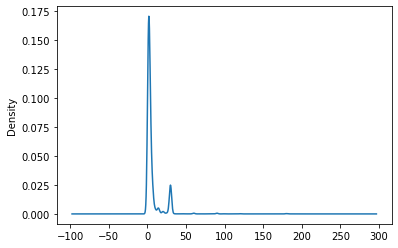

In [ ]:
dt[dt['minimum_nights']<200]['minimum_nights'].plot(kind='kde')

In [ ]:
dt[dt['minimum_nights']>180].count()

id                                81
name                              80
host_id                           81
host_name                         81
neighbourhood_group               81
neighbourhood                     81
latitude                          81
longitude                         81
room_type                         81
price                             81
minimum_nights                    81
number_of_reviews                 81
last_review                       45
reviews_per_month                 45
calculated_host_listings_count    81
availability_365                  81
dtype: int64

In [ ]:
dt['availability_365'].describe()

count    48895.000000
mean       112.781327
std        131.622289
min          0.000000
25%          0.000000
50%         45.000000
75%        227.000000
max        365.000000
Name: availability_365, dtype: float64

In [ ]:
dt['reviews_per_month'].describe()

count    38843.000000
mean         1.373221
std          1.680442
min          0.010000
25%          0.190000
50%          0.720000
75%          2.020000
max         58.500000
Name: reviews_per_month, dtype: float64

<AxesSubplot:ylabel='Density'>

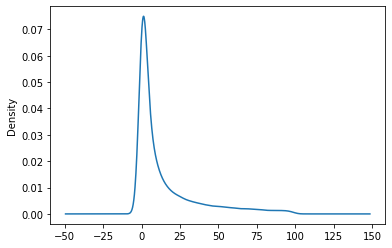

In [ ]:

dt[dt['number_of_reviews']<100]['number_of_reviews'].plot(kind='kde')

In [ ]:
dt[dt['number_of_reviews']>100].count()

id                                2995
name                              2995
host_id                           2995
host_name                         2992
neighbourhood_group               2995
neighbourhood                     2995
latitude                          2995
longitude                         2995
room_type                         2995
price                             2995
minimum_nights                    2995
number_of_reviews                 2995
last_review                       2995
reviews_per_month                 2995
calculated_host_listings_count    2995
availability_365                  2995
dtype: int64

In [ ]:
dt[dt['number_of_reviews']==0].count()

id                                10052
name                              10042
host_id                           10052
host_name                         10047
neighbourhood_group               10052
neighbourhood                     10052
latitude                          10052
longitude                         10052
room_type                         10052
price                             10052
minimum_nights                    10052
number_of_reviews                 10052
last_review                           0
reviews_per_month                     0
calculated_host_listings_count    10052
availability_365                  10052
dtype: int64

In [ ]:
dt[dt['number_of_reviews']>0]['number_of_reviews'].describe()

count    38843.000000
mean        29.297557
std         48.186374
min          1.000000
25%          3.000000
50%          9.000000
75%         33.000000
max        629.000000
Name: number_of_reviews, dtype: float64

In [ ]:
dt['room_type'].value_counts()

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

In [ ]:
dt[dt['host_id']==244361589]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
42074,32678718,Luxury accommodation minutes from Central Park!,244361589,Row NYC,Manhattan,Theater District,40.75781,-73.98903,Private room,499,1,0,NaN,NaN,9,293
42075,32678719,Enjoy great views of the City in our Deluxe Room!,244361589,Row NYC,Manhattan,Theater District,40.75918,-73.98801,Private room,100,1,156,2019-07-07,58.50,9,299
42076,32678720,Great Room in the heart of Times Square!,244361589,Row NYC,Manhattan,Theater District,40.75828,-73.98876,Private room,199,1,82,2019-07-07,27.95,9,299
42077,32678721,Nice Room 1 block away from Times Square action!,244361589,Row NYC,Manhattan,Theater District,40.75783,-73.98908,Private room,100,1,38,2019-07-04,14.62,9,295
42078,32678723,Spacious room in the Heart of Midtown!,244361589,Row NYC,Manhattan,Theater District,40.75803,-73.98887,Private room,100,1,6,2019-06-15,2.61,9,289
42079,32678724,Steps from varied cuisines at Restaurant Row!,244361589,Row NYC,Manhattan,Theater District,40.75792,-73.98900,Private room,249,1,0,NaN,NaN,9,278
42080,32678725,Enjoy the Times Square experience with the fam...,244361589,Row NYC,Manhattan,Theater District,40.75976,-73.98761,Private room,249,1,22,2019-06-23,7.59,9,283
42081,32678726,Steps away from the Heart of the Theater Distr...,244361589,Row NYC,Manhattan,Theater District,40.75925,-73.98767,Private room,100,1,1,2019-05-04,0.45,9,299
42082,32678727,In the center of all Broadway Theater ACTION!,244361589,Row NYC,Manhattan,Theater District,40.75821,-73.98820,Private room,249,1,0,NaN,NaN,9,298


###FEATURE ENGINEERING

columns to create:

'id': leave, potentially drop it at the end. 

'name': leave, potentially drop it at the end.

'host_id': add column with avg price host listing, then drop it; YU

'host_name': leave potentially drop

'neighbourhood_group': one hot encode YU

'neighbourhood': one hot encode YU

'latitude', 'longitude': leave

'room_type': one hot encode YU

'price': target variable, leave

'minimum_nights': one hot encoding in categories. 1-30 days (vacation), 30-360 days (short term lease), >360 (long term) YU

'number_of_reviews': quantile encoding + "0 reviews column" LU

'**last_review**': number of days since 2019/07/08 LU

'reviews_per_month': null values as 0 and normalize LU 

'**calculated_host_listings_count**': one hot encoding for number of listings (1,2-10, >10) LU

'**availability_365**': encode -  event (< 30 days), seasonal (30-180 days), professional (>180 days) LU





In [ ]:
#DEFINE THE CATEGORY THRESHOLDS: 

#MIN NIGHTS: we want to define three categories based on client behavior
#1-30 days = vacation
#30-360 days = short term lease
#>360 days = long term lease
vacation_threshold = 30
short_term_threshold = 360


#AVAILABILITY_36: we want to define three categories based on renter behavior
#1-30 days = event
#30-180 days = seasonal
#>180 days = professional
event_threshold = 30
seasonal_threshold = 180

#CALCULATED HOST LISTING COUNT: we want to define three categories based on renter behavior
#1 listing: rookie host
#2-10 listings: multi property host
#>10 listings: super host
rookie_threshold = 1
multiprop_threshold = 10


In [ ]:
#MAPPING FUNCTIONS
# create a function to map the min_nights values to the appropriate category
def categorize_min_nights(nights):
    if nights <= event_threshold:
        return 'event'
    elif nights <= short_term_threshold:
        return 'short_term_lease'
    else:
        return 'long_term'

# create a function to map the availability_365 values to the appropriate category
def categorize_availabilty(days):
    if days <= vacation_threshold:
        return 'vacation'
    elif days <= seasonal_threshold:
        return 'seasonal'
    else:
        return 'professional'

# create a function to map the number of listings values to the appropriate category
def categorize_listing_count(listing):
    if listing == rookie_threshold:
        return 'rookie'
    elif listing <= multiprop_threshold:
        return 'multiprop'
    else:
        return 'super_host'

In [ ]:

def preprocessing(data):
    df = data.copy()
    
    #VARIABLE - HOST ID
    # Calculate the mean price for each host_id
    host_means = df.groupby('host_id')['price'].mean()

    # Map the host means to the host_id column
    df['mean_price_per_host'] = df['host_id'].map(host_means)
    
    #VARIABLES TO HOT ENCODE: minimum_nights, availability_365, calculated_host_listings_count, neighbourhood_group, neighbourhood, room_type 
    # apply the categorize_min_nights function to the minimum_nights column and create one hot encoded columns
    df['min_nights_category'] = df['minimum_nights'].apply(categorize_min_nights)
    df['availability_365_category'] = df['availability_365'].apply(categorize_availabilty)
    df['listing_category'] = df['calculated_host_listings_count'].apply(categorize_listing_count)
    
    one_hot_encode_columns = ['neighbourhood_group', 'neighbourhood', "room_type",'min_nights_category','availability_365_category','listing_category']
    
    #one hot encoding variables
    for i in one_hot_encode_columns:
        one_hot_encoded = pd.get_dummies(df[i])
        df = pd.concat([df, one_hot_encoded], axis=1)
    
    #VARIABLE - LAST REVIEW
    #transforming column into datetime type
    df['last_review'] = pd.to_datetime(df['last_review'])
    #reference day to compute days from
    day = datetime.datetime(2019, 7, 8)

    #computing the number of days since the last review
    df['n_days'] = (day - df['last_review'])/np.timedelta64(1, 'D')

    #filling the missing values with the median 
    df['n_days'] = df['n_days'].fillna(df['n_days'].median())

    #VARIABLE - REVIEWS PER MONTH
    #filling the missing values
    df['reviews_per_month'] = df['reviews_per_month'].fillna(0)

    #detecting the outliers
    Q1_rev = df['reviews_per_month'].quantile(0.25)
    Q3_rev = df['reviews_per_month'].quantile(0.75)
    IQR = Q3_rev - Q1_rev
    whisker_width = 1.5
    upper_whisker = Q3_rev + (whisker_width*IQR)

    #capping the outliers
    df.loc[df['reviews_per_month'] > upper_whisker, 'reviews_per_month'] = upper_whisker

    #VARIABLE - NUMBER OF REVIEWS
    #quantile encoding
    Q1 = df['number_of_reviews'].quantile(0.25)
    Q2 = df['number_of_reviews'].quantile(0.5)
    Q3 = df['number_of_reviews'].quantile(0.75)

    df['number_of_reviews_quant'] = np.where((df.number_of_reviews <= Q1), 1,   
                 np.where((df.number_of_reviews>Q1) & (df.number_of_reviews<=Q2), 2,
                  np.where((df.number_of_reviews>Q2) & (df.number_of_reviews<=Q3), 3,
                    4)))  
    
    #keeping track of the rows with no reviews
    df['zero_reviews'] = np.where(df.number_of_reviews == 0,1,0)  


    #dropping the columns that are no longer needed
    df = df.drop(['id', 'name', "host_id", "host_name", 'neighbourhood_group', 'neighbourhood', "room_type", 'min_nights_category','availability_365_category','listing_category','minimum_nights','availability_365','calculated_host_listings_count','last_review','number_of_reviews' ], axis = 1)
    
    return df

In [ ]:
dt = preprocessing(dt)

In [ ]:

X_df = dt.drop(columns=['price'])  # 假设 'valeurfonc' 是标签
y_df = dt['price']

In [ ]:
#Checking that all the columns that had to be canceled, have been canceled
l = ['id','name','host_id','host_name','neighbourhood_group','neighbourhood','room_type','minimum_nights',
     'number_of_reviews','last_review','calculated_host_listings_count','availability_365']

for i in l: 
  if i in list(dt):
    print(i)

In [ ]:
dt

,latitude,longitude,price,reviews_per_month,mean_price_per_host,Bronx,Brooklyn,Manhattan,Queens,Staten Island,...,short_term_lease,professional,seasonal,vacation,multiprop,rookie,super_host,n_days,number_of_reviews_quant,zero_reviews
0,40.64749,-73.97237,149,0.21,100.666667,0,1,0,0,0,...,0,1,0,0,1,0,0,262.0,3,0
1,40.75362,-73.98377,225,0.38,162.000000,0,0,1,0,0,...,0,1,0,0,1,0,0,48.0,4,0
2,40.80902,-73.94190,150,0.00,150.000000,0,0,1,0,0,...,0,1,0,0,0,1,0,50.0,1,1
3,40.68514,-73.95976,89,3.89,89.000000,0,1,0,0,0,...,0,1,0,0,0,1,0,3.0,4,0
4,40.79851,-73.94399,80,0.10,80.000000,0,0,1,0,0,...,0,0,0,1,0,1,0,231.0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,40.67853,-73.94995,70,0.00,65.000000,0,1,0,0,0,...,0,0,0,1,1,0,0,50.0,1,1
48891,40.70184,-73.93317,40,0.00,50.000000,0,1,0,0,0,...,0,0,1,0,1,0,0,50.0,1,1
48892,40.81475,-73.94867,115,0.00,115.000000,0,0,1,0,0,...,0,0,0,1,0,1,0,50.0,1,1
48893,40.75751,-73.99112,55,0.00,97.666667,0,0,1,0,0,...,0,0,0,1,1,0,0,50.0,1,1


In [ ]:
for col in dt.columns:
    print(col)

latitude
longitude
price
reviews_per_month
mean_price_per_host
Bronx
Brooklyn
Manhattan
Queens
Staten Island
Allerton
Arden Heights
Arrochar
Arverne
Astoria
Bath Beach
Battery Park City
Bay Ridge
Bay Terrace
Bay Terrace, Staten Island
Baychester
Bayside
Bayswater
Bedford-Stuyvesant
Belle Harbor
Bellerose
Belmont
Bensonhurst
Bergen Beach
Boerum Hill
Borough Park
Breezy Point
Briarwood
Brighton Beach
Bronxdale
Brooklyn Heights
Brownsville
Bull's Head
Bushwick
Cambria Heights
Canarsie
Carroll Gardens
Castle Hill
Castleton Corners
Chelsea
Chinatown
City Island
Civic Center
Claremont Village
Clason Point
Clifton
Clinton Hill
Co-op City
Cobble Hill
College Point
Columbia St
Concord
Concourse
Concourse Village
Coney Island
Corona
Crown Heights
Cypress Hills
DUMBO
Ditmars Steinway
Dongan Hills
Douglaston
Downtown Brooklyn
Dyker Heights
East Elmhurst
East Flatbush
East Harlem
East Morrisania
East New York
East Village
Eastchester
Edenwald
Edgemere
Elmhurst
Eltingville
Emerson Hill
Far Rockaway


# Helper functions

In [ ]:
def get_cartesian(lat=None,lon=None):
    '''
    Converts latitude and longitude arrays into (x,y,z) coordinates
    Input :
          latitude as array
          longitude as array
    Output :
          x,y,z cartesian coordinates
    '''
    # Change degrees to radians
    lat, lon = np.deg2rad(lat), np.deg2rad(lon)
    R = 1 # radius of the earth = 6371 km but not needed as we will normalize

    # Convert to cartesian
    x = R * np.cos(lat) * np.cos(lon)
    y = R * np.cos(lat) * np.sin(lon)
    z = R *np.sin(lat)

    return x,y,z



def scores(y_true,y_pred, plot=False):
  '''
  Compute MAE, MSE, RMSE, R2 and MAPE scores and plot prediction errors
  Inputs :
        y_true : true target values
        y_pred : predictions
        plot: if True plots errors
  Outputs:
        A score dictionary containing the computed metrics
  '''
  #Compute MAE, MSE, RMSE, R2 and MAPE scores
  mae = mean_absolute_error(y_true=y_true, y_pred=y_pred)
  mse = mean_squared_error(y_true=y_true, y_pred=y_pred)
  rmse = mean_squared_error(y_true=y_true, y_pred=y_pred, squared=False)
  r2 = r2_score(y_true=y_true, y_pred=y_pred)
  mape = mean_absolute_percentage_error(y_true=y_true, y_pred=y_pred)
  error_ratio_rmse = rmse/np.mean(y_true)
  error_ratio_mae = mae/np.mean(y_true)

  # Plot the obtained errors and residuals if plot argument is set to True
  if plot:
      fig, axs = plt.subplots(ncols=2,figsize=(15,5))
      x = np.arange(np.amin(y_true),np.amax(y_true))
      axs[0].scatter(y_pred,y_true,label="actual_vs_predicted")
      axs[0].plot(x,x,color='black',linestyle='dashed')
      axs[0].set_title("Actual vs. Predicted values")
      axs[0].set_ylabel("Actual")
      axs[0].set_xlabel("Predicted")
      axs[1].scatter(y_pred,y_true-y_pred,label="residual_vs_predicted")
      axs[1].plot(x,[0]*len(x),color='black',linestyle='dashed')
      axs[1].set_title("Residuals vs. Predicted Values")
      axs[1].set_ylabel("Residuals (Actuals-Predictions)")
      axs[1].set_xlabel("Predicted")
      fig.suptitle("Prediction errors")
      plt.show()

  # Print the scores
  print(f'R²: {r2}')
  print(f'MAE: {mae}')
  print(f'MSE: {mse}')
  print(f'RMSE: {rmse}')
  print(f'MAPE: {mape}')
  print(f'error_ratio_rmse: {error_ratio_rmse}')
  print(f'error_ratio_mae: {error_ratio_mae}')

  #Return the scores in a dictionary
  scores = {
            'R2': r2,
            'MAE': mae,
            'MSE': mse,
            'RMSE': rmse,
            'MAPE': mape,
            'error_ratio_rmse': error_ratio_rmse,
            'error_ratio_mae': error_ratio_mae,
            }

  return scores

# Additional dictionaries

In [ ]:
# import necessary libraries

import pandas as pd
import numpy as np
import os
import glob

# for modeling
import statsmodels.api as sm
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import RidgeCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import HuberRegressor
from sklearn.svm import SVR
import xgboost as xg
from statsmodels.tsa.statespace.sarimax import SARIMAX
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.ar_model import AutoReg


# for scoring
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,mean_absolute_percentage_error

# for visualizations
import matplotlib.pyplot as plt
import seaborn as sns

## Split Train and Test set

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_df.to_numpy(), y_df.to_numpy(), test_size=0.20, random_state=100)

# Modles

## 1.Linear Regression

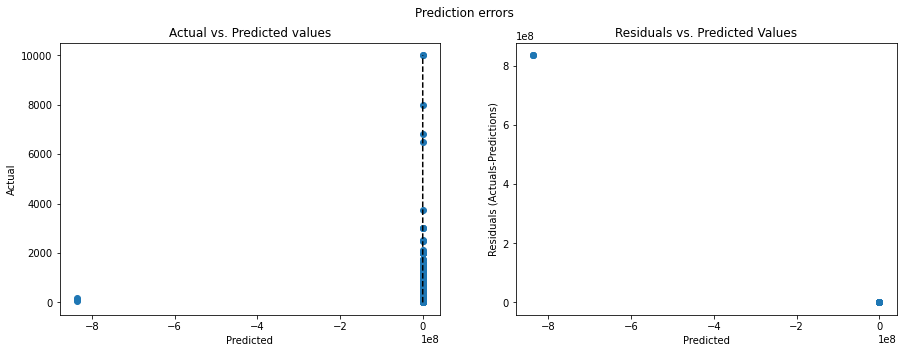

R²: -3561416951.008845
MAE: 256626.09488478603
MSE: 214645385287269.06
RMSE: 14650781.047004595
MAPE: 3616030428346.638
error_ratio_rmse: 96754.55720192978
error_ratio_mae: 1694.7727290016678


In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lin_reg = lin_reg.predict(X_test)
lin_reg_scores = scores(y_test,y_pred_lin_reg,plot=True)

In [ ]:
# cross_validation
cv_result = cross_validate(lin_reg, X_train, y_train,scoring=('r2', 'neg_mean_squared_error','neg_mean_absolute_error','neg_mean_absolute_percentage_error'))
pd.DataFrame(cv_result)

,fit_time,score_time,test_r2,test_neg_mean_squared_error,test_neg_mean_absolute_error,test_neg_mean_absolute_percentage_error
0,2.380790,0.036927,-1.167041e+10,-7.360060e+14,-4.337674e+05,-1.475826e+13
1,3.037109,0.016634,-1.129015e+10,-5.878128e+14,-2.741295e+05,-3.846760e+13
2,1.522079,0.014339,-4.549208e+11,-2.705819e+16,-4.158622e+06,-1.161394e+13
3,1.060248,0.010045,-4.402172e+12,-2.386676e+17,-5.976040e+06,-7.600193e+13
4,0.998535,0.006376,-1.707969e+10,-9.610375e+14,-3.505125e+05,-1.569142e+13


## 2.Lasso & Ridge

--- Lasso ---


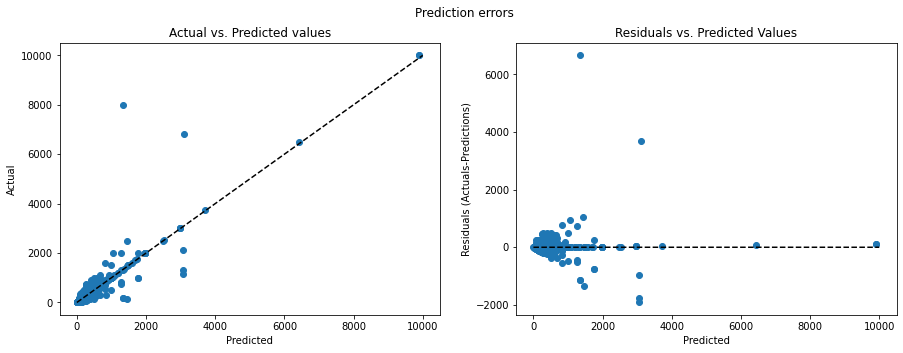

R²: 0.8540223259280336
MAE: 13.17832966558822
MSE: 8798.024639278123
RMSE: 93.79778589752597
MAPE: 676270694641.621
error_ratio_rmse: 0.6194456945278033
error_ratio_mae: 0.08703040796010907
509.61284256675486
--- Ridge ---


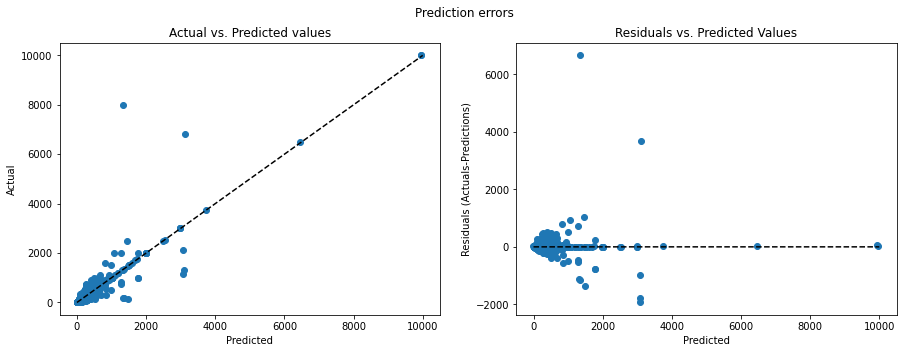

R²: 0.8540465446343337
MAE: 15.738585719757117
MSE: 8796.56498610777
RMSE: 93.79000472389247
MAPE: 3604717723783.7163
error_ratio_rmse: 0.619394307232682
error_ratio_mae: 0.10393847859811221
1.0


In [ ]:
print('--- Lasso ---')
lasso = LassoCV(cv=5, alphas=np.random.default_rng().uniform(500,1000,100)).fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)
lasso_scores = scores(y_test,y_pred_lasso,plot=True)

print(lasso.alpha_)

print('--- Ridge ---')
ridge = RidgeCV(alphas=(0.001,0.01,0.1,1,0.00001),cv=5).fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)
ridge_scores = scores(y_test,y_pred_ridge,plot=True)

print(ridge.alpha_)

## 3. Robust Regression

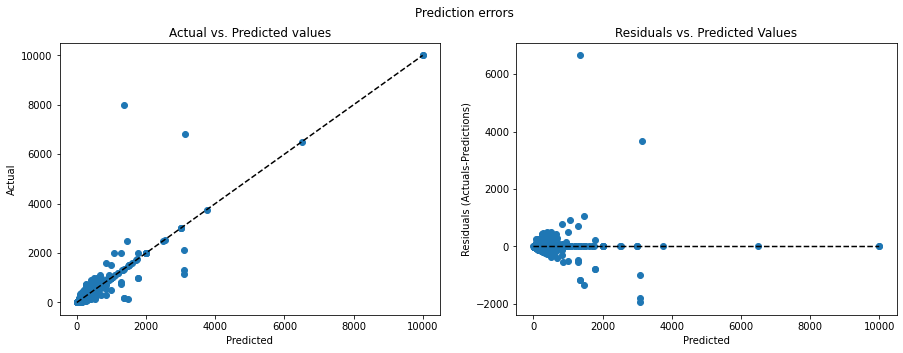

R²: 0.85414588220572
MAE: 12.574990982614958
MSE: 8790.577944553515
RMSE: 93.75808202258361
MAPE: 592500708.34216
error_ratio_rmse: 0.6191834879719259
error_ratio_mae: 0.08304592638697077


In [ ]:
huber = HuberRegressor(epsilon=1.35, max_iter=10000, alpha=0.0001).fit(X_train,y_train)
y_pred_huber = huber.predict(X_test)
huber_scores=scores(y_test,y_pred_huber,plot=True)

In [ ]:
# cross_validation
cv_result = cross_validate(huber, X_train, y_train,scoring=('r2', 'neg_mean_squared_error','neg_mean_absolute_error','neg_mean_absolute_percentage_error'))
pd.DataFrame(cv_result)

,fit_time,score_time,test_r2,test_neg_mean_squared_error,test_neg_mean_absolute_error,test_neg_mean_absolute_percentage_error
0,9.829178,0.006145,0.942940,-3598.539802,-12.473447,-1.546852e+13
1,13.694291,0.024264,0.957733,-2200.618904,-11.150903,-4.562141e+13
2,14.755008,0.013808,0.875429,-7409.341376,-13.383661,-1.510551e+13
3,9.148312,0.006534,0.933027,-3631.022210,-12.384284,-8.669590e+13
4,11.972002,0.015402,0.855257,-8144.376788,-12.918116,-1.564040e+13


## 4. Random Forest

In [ ]:
# Training
rf = RandomForestRegressor(n_estimators = 300, max_features = 'sqrt', max_depth = 12, random_state = 18).fit(X_train, y_train)

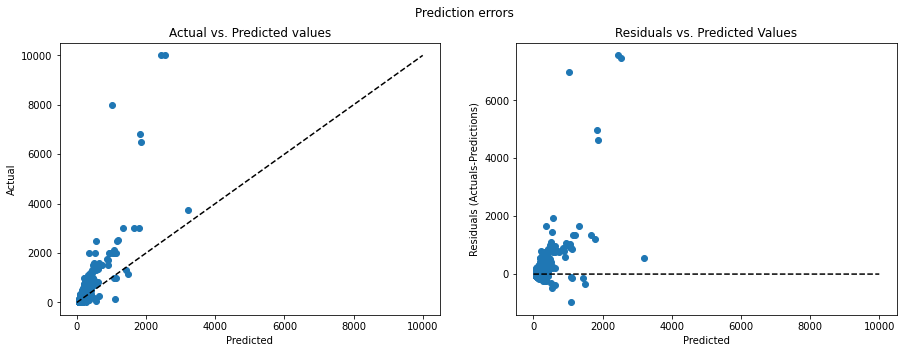

R²: 0.47996527603147787
MAE: 55.50004958655885
MSE: 31342.31548654257
RMSE: 177.0376103728882
MAPE: 73214651510859.8
error_ratio_rmse: 1.1691660359103309
error_ratio_mae: 0.3665253548738645


In [ ]:
y_pred_random_forest = rf.predict(X_test)
random_forest_scores=scores(y_test,y_pred_random_forest,plot=True)

In [ ]:
# cross_validation
cv_result = cross_validate(rf, X_train, y_train,scoring=('r2', 'neg_mean_squared_error','neg_mean_absolute_error','neg_mean_absolute_percentage_error'))
pd.DataFrame(cv_result)

,fit_time,score_time,test_r2,test_neg_mean_squared_error,test_neg_mean_absolute_error,test_neg_mean_absolute_percentage_error
0,16.446353,0.310215,0.524064,-30015.355401,-57.691526,-3.950436e+13
1,14.758793,0.341432,0.524273,-24768.372526,-54.174777,-1.277736e+14
2,20.709389,1.447899,0.480129,-30921.344147,-57.538377,-4.659562e+13
3,19.408674,0.440437,0.521166,-25960.427719,-56.589960,-1.237383e+14
4,17.579283,0.345553,0.462094,-30266.810849,-56.053643,-1.700942e+14


## 5. XGBOOST

In [ ]:
# Before tuning
#xgb = xg.XGBRegressor(n_estimators=1000, learning_rate=0.01).fit(X_train, y_train)
# After hyper-parameter tuning using bayesian search(see below blocks)
xgb = xg.XGBRegressor(n_estimators=180, colsample_bytree=0.534145326940449, gamma=1.013878917680906, max_depth=18, min_child_weight=1, reg_alpha=58, reg_lambda=0.8886087308195848, seed=0).fit(X_train, y_train)

#xgb = xg.XGBRegressor(n_estimators=258, colsample_bytree=0.8989653194310321, gamma=1.013878917680906, max_depth=18, min_child_weight=1, reg_alpha=58, reg_lambda=0.8886087308195848, seed=0).fit(X_train, y_train)


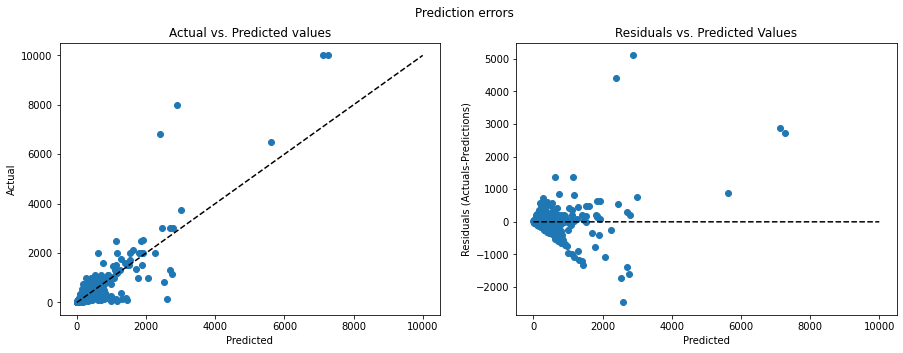

R²: 0.8043911969952232
MAE: 21.60980607873519
MSE: 11789.275856301803
RMSE: 108.57843181913157
MAPE: 11223083778021.33
error_ratio_rmse: 0.7170578864454381
error_ratio_mae: 0.14271233811081185


In [ ]:
y_pred_xgb = xgb.predict(X_test)
xgb_scores=scores(y_test,y_pred_xgb,plot= True)

In [ ]:
# cross_validation
cv_result = cross_validate(xgb, X_train, y_train,scoring=('r2', 'neg_mean_squared_error','neg_mean_absolute_error','neg_mean_absolute_percentage_error'))
pd.DataFrame(cv_result)

,fit_time,score_time,test_r2,test_neg_mean_squared_error,test_neg_mean_absolute_error,test_neg_mean_absolute_percentage_error
0,137.002345,0.185923,0.872158,-8062.457242,-21.960696,-1.495135e+13
1,160.309947,0.526135,0.864387,-7060.581713,-21.737060,-7.707632e+13
2,137.120272,0.754352,0.810784,-11254.366024,-22.250269,-1.995213e+13
3,152.555991,0.205302,0.870569,-7017.211756,-20.895598,-9.071699e+13
4,167.268018,0.277531,0.759226,-13547.843101,-21.910562,-4.115116e+13


## 6. Gradient Boosting (sklearn)

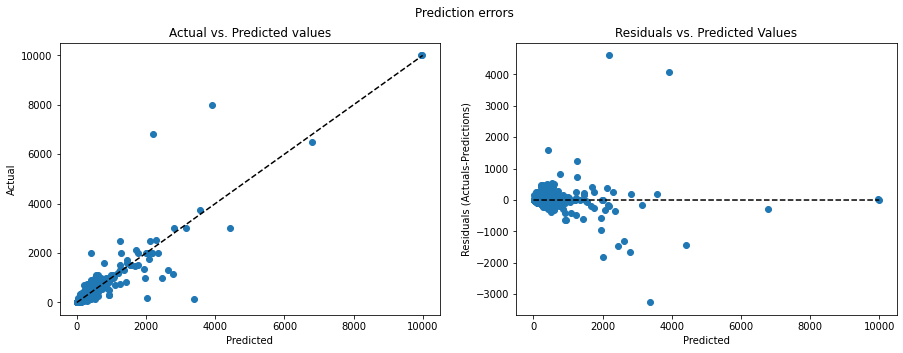

R²: 0.8648020294009039
MAE: 14.124596242876258
MSE: 8148.335586747607
RMSE: 90.26813162322352
MAPE: 4176500906608.8003
error_ratio_rmse: 0.596135665165522
error_ratio_mae: 0.09327960405325582


In [ ]:
gdb = GradientBoostingRegressor(n_estimators = 300, max_depth = 5, min_samples_split = 2, learning_rate = 0.1, loss = 'squared_error')
gdb.fit(X_train, y_train)
y_pred = gdb.predict(X_test)
gdb_scores=scores(y_test, y_pred, plot= True)

In [ ]:
# cross_validation
cv_result = cross_validate(gdb, X_train, y_train,scoring=('r2', 'neg_mean_squared_error','neg_mean_absolute_error','neg_mean_absolute_percentage_error'))
pd.DataFrame(cv_result)

## 7. Gradient Boosting Decision Tree

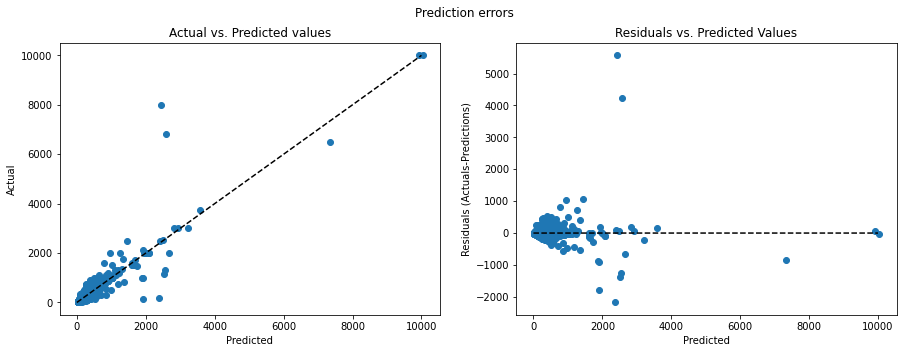

R²: 0.867076443566696
MAE: 14.876419564207406
MSE: 8011.257420529552
RMSE: 89.5056278707074
MAPE: 14404870369378.213
error_ratio_rmse: 0.5911000487910222
error_ratio_mae: 0.09824468627761626


In [ ]:
# Initialising the GBDT model
gbdt = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=100)

# Training models
gbdt.fit(X_train, y_train)

# Making predictions on the test set
y_gbdt = gbdt.predict(X_test)

xgb_scores=scores(y_test,y_gbdt,plot= True)

## 8.Stacking

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor

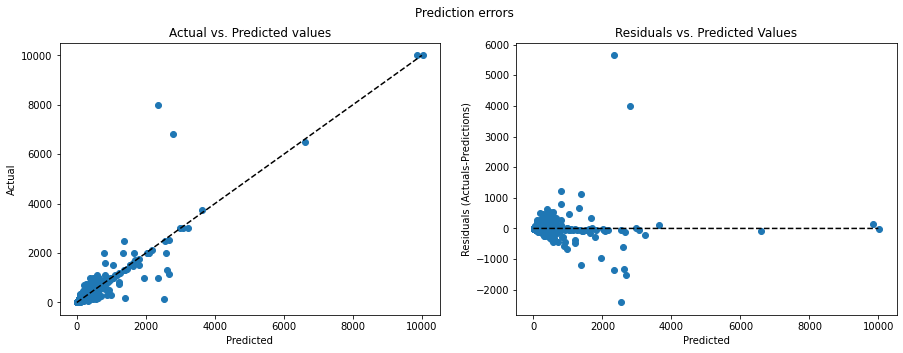

R²: 0.8667898521690988
MAE: 14.064727602395584
MSE: 8028.530186337715
RMSE: 89.60206574816071
MAPE: 2868858794168.238
error_ratio_rmse: 0.5917369297941956
error_ratio_mae: 0.0928842282858203


In [ ]:
# Train multiple base learners
model1 = LinearRegression()
model1.fit(X_train, y_train)

model2 = RandomForestRegressor(n_estimators=100, random_state=100)
model2.fit(X_train, y_train)

model3 = MLPRegressor(hidden_layer_sizes=(50,50), max_iter=1000, random_state=100)
model3.fit(X_train, y_train)

# Make predictions on the testing set using the base learners
y_stacking1 = model1.predict(X_test)
y_stacking2 = model2.predict(X_test)
y_stacking3 = model3.predict(X_test)

# Create a design matrix from the predictions of the base learners
X_stack = np.column_stack((y_stacking1, y_stacking2, y_stacking3))

# Train a meta-learner on the design matrix
meta_learner = LinearRegression()
meta_learner.fit(X_stack, y_test)

# Use the base learners to make predictions on the testing set
y_base_pred = np.column_stack((y_stacking1, y_stacking2, y_stacking3))

# Use the meta-learner to make predictions on the testing set and evaluate the performance
y_stack_pred = meta_learner.predict(y_base_pred)


stack_scores=scores(y_test,y_stack_pred,plot= True)

In [ ]:
# cross_validation1
cv_result = cross_validate(model1, X_train, y_train, scoring=('r2', 'neg_mean_squared_error','neg_mean_absolute_error','neg_mean_absolute_percentage_error'))
pd.DataFrame(cv_result)

In [ ]:
# cross_validation2
cv_result = cross_validate(model2, X_train, y_train, scoring=('r2', 'neg_mean_squared_error','neg_mean_absolute_error','neg_mean_absolute_percentage_error'))
pd.DataFrame(cv_result)

In [ ]:
# cross_validation3
cv_result = cross_validate(model3, X_train, y_train, scoring=('r2', 'neg_mean_squared_error','neg_mean_absolute_error','neg_mean_absolute_percentage_error'))
pd.DataFrame(cv_result)